In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset, load_metric

In [2]:
os.chdir('../..')

## Load prediction files

In [3]:
prediction_file_dict = {
    0: 'data/raw/example_eval_predictions.json',
    1: 'data/raw/example_eval_predictions_epochp1.json'
}

In [4]:
predictions_df = pd.DataFrame()

for checkpoint, fp in prediction_file_dict.items():
    eval_predictions_df = pd.read_json(fp, orient='index')
    eval_predictions_df.reset_index(inplace=True)
    eval_predictions_df.rename(columns={'index': 'id', 0: "prediction_text"}, inplace=True)
    eval_predictions_df['checkpoint'] = checkpoint
    
    predictions_df = predictions_df.append(eval_predictions_df)

In [5]:
print(predictions_df.shape)
predictions_df.head()

(23746, 3)


,id,prediction_text,checkpoint
0,56ddde6b9a695914005b9628,France,0
1,56ddde6b9a695914005b9629,10th and 11th centuries,0
2,56ddde6b9a695914005b962a,"Denmark, Iceland and Norway",0
3,56ddde6b9a695914005b962b,Rollo,0
4,56ddde6b9a695914005b962c,10th,0


## Load labels

In [6]:
squad_v2_val = load_dataset('squad_v2', split='validation')

Reusing dataset squad_v2 (/Users/stevengeorge/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/ba48bc29b974701e9ba8d80ac94f3e3df924aba41b764dcf9851debea7c672e4)


In [7]:
squad_v2_val_df = pd.DataFrame(squad_v2_val)
print(squad_v2_val_df.shape)
squad_v2_val_df.head()

(11873, 5)


,answers,context,id,question,title
0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9628,In what country is Normandy located?,Normans
1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9629,When were the Normans in Normandy?,Normans
2,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962a,From which countries did the Norse originate?,Normans
3,"{'answer_start': [308, 308, 308, 308], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962b,Who was the Norse leader?,Normans
4,"{'answer_start': [671, 649, 671, 671], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962c,What century did the Normans first gain their ...,Normans


## Merge with categories

In [8]:
squad2_categories = pd.read_csv('data/processed/squad2_dev_simple_categories.csv')
print(squad2_categories.shape)
squad2_categories.head()

(11873, 6)


,id,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin,unanswerable
0,56ddde6b9a695914005b9628,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
1,56ddde6b9a695914005b9629,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
2,56ddde6b9a695914005b962a,which,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
3,56ddde6b9a695914005b962b,was,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
4,56ddde6b9a695914005b962c,what,"(165.106, 947.8]","(48.2, 85.4]","(-0.157, 39.333]",0


In [9]:
combined = predictions_df.merge(squad_v2_val_df, on='id', how='inner')

assert combined.shape[0] == predictions_df.shape[0]

combined.head()

,id,prediction_text,checkpoint,answers,context,question,title
0,56ddde6b9a695914005b9628,France,0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans
1,56ddde6b9a695914005b9628,France,1,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans
2,56ddde6b9a695914005b9629,10th and 11th centuries,0,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,Normans
3,56ddde6b9a695914005b9629,10th and 11th centuries,1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,Normans
4,56ddde6b9a695914005b962a,"Denmark, Iceland and Norway",0,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,From which countries did the Norse originate?,Normans


In [10]:
combined = combined.merge(squad2_categories, on='id', how='inner')

assert combined.shape[0] == predictions_df.shape[0]

combined.head()

,id,prediction_text,checkpoint,answers,context,question,title,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin,unanswerable
0,56ddde6b9a695914005b9628,France,0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
1,56ddde6b9a695914005b9628,France,1,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
2,56ddde6b9a695914005b9629,10th and 11th centuries,0,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,Normans,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
3,56ddde6b9a695914005b9629,10th and 11th centuries,1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,Normans,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
4,56ddde6b9a695914005b962a,"Denmark, Iceland and Norway",0,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,From which countries did the Norse originate?,Normans,which,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0


## Evaluation function

In [11]:
SQUAD_V2_METRIC = load_metric("squad_v2")

In [12]:
SQUAD_V2_METRIC

Metric(name: "squad_v2", features: {'predictions': {'id': Value(dtype='string', id=None), 'prediction_text': Value(dtype='string', id=None), 'no_answer_probability': Value(dtype='float32', id=None)}, 'references': {'id': Value(dtype='string', id=None), 'answers': Sequence(feature={'text': Value(dtype='string', id=None), 'answer_start': Value(dtype='int32', id=None)}, length=-1, id=None)}}, usage: """
Computes SQuAD v2 scores (F1 and EM).
Args:
    predictions: List of triple for question-answers to score with the following elements:
        - the question-answer 'id' field as given in the references (see below)
        - the text of the answer
        - the probability that the question has no answer
    references: List of question-answers dictionaries with the following key-values:
            - 'id': id of the question-answer pair (see above),
            - 'answers': a list of Dict {'text': text of the answer as a string}
    no_answer_threshold: float
        Probability threshold

In [13]:
def squad2_evaluation(id_list, prediction_text_list, answers_list):
    predictions = [
        {
            'prediction_text': prediction_text, 
            'id': _id, 
            'no_answer_probability': 0.0  # Same as https://github.com/huggingface/transformers/blob/master/examples/pytorch/question-answering/run_qa.py#L532
        } for 
        _id, prediction_text in zip(id_list, prediction_text_list)
    ]
    
    references = [
        {
            'id': _id, 
            'answers': answers
        } for 
        _id, answers in zip(id_list, answers_list)
    ]
    
    metrics = SQUAD_V2_METRIC.compute(predictions=predictions, references=references)
    
    return metrics

Check:

In [14]:
squad2_evaluation(
    id_list=list(combined[combined['checkpoint'] == 0]['id']), 
    prediction_text_list=list(combined[combined['checkpoint'] == 0]['prediction_text']), 
    answers_list=list(combined[combined['checkpoint'] == 0]['answers'])
)

{'exact': 82.39703529015414,
 'f1': 85.29448338798474,
 'total': 11873,
 'HasAns_exact': 79.60526315789474,
 'HasAns_f1': 85.40846849958548,
 'HasAns_total': 5928,
 'NoAns_exact': 85.18082422203533,
 'NoAns_f1': 85.18082422203533,
 'NoAns_total': 5945,
 'best_exact': 82.39703529015414,
 'best_exact_thresh': 0.0,
 'best_f1': 85.2944833879847,
 'best_f1_thresh': 0.0}

In [15]:
squad2_evaluation(
    id_list=list(combined[combined['checkpoint'] == 1]['id']), 
    prediction_text_list=list(combined[combined['checkpoint'] == 1]['prediction_text']), 
    answers_list=list(combined[combined['checkpoint'] == 1]['answers'])
)

{'exact': 83.02029815547881,
 'f1': 86.17152660896174,
 'total': 11873,
 'HasAns_exact': 80.48245614035088,
 'HasAns_f1': 86.79394997101957,
 'HasAns_total': 5928,
 'NoAns_exact': 85.55088309503785,
 'NoAns_f1': 85.55088309503785,
 'NoAns_total': 5945,
 'best_exact': 83.02029815547881,
 'best_exact_thresh': 0.0,
 'best_f1': 86.17152660896163,
 'best_f1_thresh': 0.0}

Both match values reported to wandb

## Plots

### WWWWWWH questions

In [16]:
combined.head()

,id,prediction_text,checkpoint,answers,context,question,title,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin,unanswerable
0,56ddde6b9a695914005b9628,France,0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
1,56ddde6b9a695914005b9628,France,1,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
2,56ddde6b9a695914005b9629,10th and 11th centuries,0,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,Normans,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
3,56ddde6b9a695914005b9629,10th and 11th centuries,1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,Normans,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
4,56ddde6b9a695914005b962a,"Denmark, Iceland and Norway",0,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,From which countries did the Norse originate?,Normans,which,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0


In [17]:
combined['w8h_label'].unique()

array(['what', 'when', 'which', 'was', 'who', 'where', 'how', 'other',
       'whose', 'why', 'whom'], dtype=object)

In [18]:
combined['w8h_label'].nunique()

11

In [19]:
full_metrics_df = pd.DataFrame()

for checkpoint in combined['checkpoint'].unique():
    for label in combined['w8h_label'].unique():
        
        combined_subset = combined.copy()[
            (combined['w8h_label'] == label) & 
            (combined['checkpoint'] == checkpoint)
        ]
        
        id_list = list(combined_subset['id'])
        prediction_text_list = list(combined_subset['prediction_text'])
        answers_list = list(combined_subset['answers'])

        metrics = squad2_evaluation(
            id_list=id_list, 
            prediction_text_list=prediction_text_list, 
            answers_list=answers_list
        )

        metrics_df = pd.DataFrame(metrics, index=[0])
        metrics_df['w8h_label'] = label
        metrics_df['checkpoint'] = checkpoint
        
        full_metrics_df = full_metrics_df.append(metrics_df, ignore_index=True)

In [20]:
print(full_metrics_df.shape)
full_metrics_df.head()

(22, 15)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,NoAns_exact,NoAns_f1,NoAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,w8h_label,checkpoint
0,82.229741,85.093479,6207,78.541053,84.355651,3057,85.809524,85.809524,3150,82.229741,0.0,85.093479,0.0,what,0
1,87.559809,89.050277,627,86.666667,89.781746,300,88.379205,88.379205,327,87.559809,0.0,89.050277,0.0,when,0
2,85.089463,87.849486,503,82.822086,87.080648,326,89.265537,89.265537,177,85.288270,0.0,88.048293,0.0,which,0
3,82.326369,84.760130,1771,83.852364,88.823748,867,80.862832,80.862832,904,82.382835,0.0,84.816595,0.0,was,0
4,85.257985,86.513520,814,87.096774,89.844099,372,83.710407,83.710407,442,85.257985,0.0,86.513520,0.0,who,0


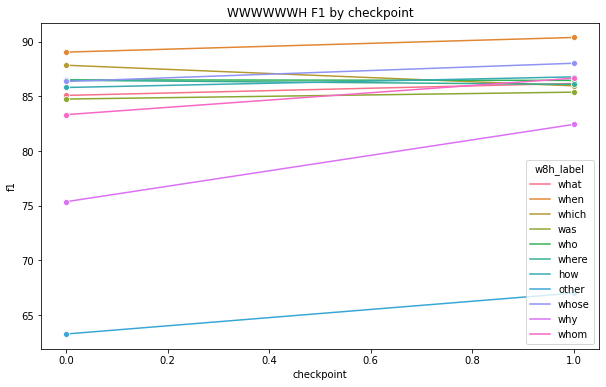

In [21]:
plt.figure(figsize=(10, 6))
plt.title('WWWWWWH F1 by checkpoint')
sns.lineplot(data=full_metrics_df, y='f1', x='checkpoint', hue='w8h_label', marker='o')
plt.show()

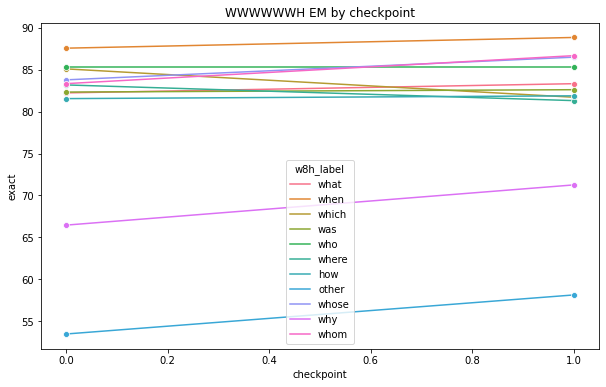

In [22]:
plt.figure(figsize=(10, 6))
plt.title('WWWWWWH EM by checkpoint')
sns.lineplot(data=full_metrics_df, y='exact', x='checkpoint', hue='w8h_label', marker='o')
plt.show()

### Answerable/Unanswerable

In [24]:
combined.head()

,id,prediction_text,checkpoint,answers,context,question,title,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin,unanswerable
0,56ddde6b9a695914005b9628,France,0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
1,56ddde6b9a695914005b9628,France,1,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
2,56ddde6b9a695914005b9629,10th and 11th centuries,0,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,Normans,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
3,56ddde6b9a695914005b9629,10th and 11th centuries,1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,Normans,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
4,56ddde6b9a695914005b962a,"Denmark, Iceland and Norway",0,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,From which countries did the Norse originate?,Normans,which,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0


In [25]:
combined['unanswerable'].unique()

array([0, 1])

In [26]:
full_metrics_df = pd.DataFrame()

for checkpoint in combined['checkpoint'].unique():
    for label in combined['unanswerable'].unique():
        
        combined_subset = combined.copy()[
            (combined['unanswerable'] == label) & 
            (combined['checkpoint'] == checkpoint)
        ]
        
        id_list = list(combined_subset['id'])
        prediction_text_list = list(combined_subset['prediction_text'])
        answers_list = list(combined_subset['answers'])

        metrics = squad2_evaluation(
            id_list=id_list, 
            prediction_text_list=prediction_text_list, 
            answers_list=answers_list
        )

        metrics_df = pd.DataFrame(metrics, index=[0])
        metrics_df['unanswerable'] = label
        metrics_df['checkpoint'] = checkpoint
        
        full_metrics_df = full_metrics_df.append(metrics_df, ignore_index=True)

In [27]:
print(full_metrics_df.shape)
full_metrics_df.head()

(4, 15)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,unanswerable,checkpoint,NoAns_exact,NoAns_f1,NoAns_total
0,79.605263,85.408468,5928,79.605263,85.408468,5928.0,79.605263,0.0,85.408468,0.0,0,0,NaN,NaN,NaN
1,85.180824,85.180824,5945,NaN,NaN,NaN,100.000000,0.0,100.000000,0.0,1,0,85.180824,85.180824,5945.0
2,80.482456,86.793950,5928,80.482456,86.793950,5928.0,80.482456,0.0,86.793950,0.0,0,1,NaN,NaN,NaN
3,85.550883,85.550883,5945,NaN,NaN,NaN,100.000000,0.0,100.000000,0.0,1,1,85.550883,85.550883,5945.0


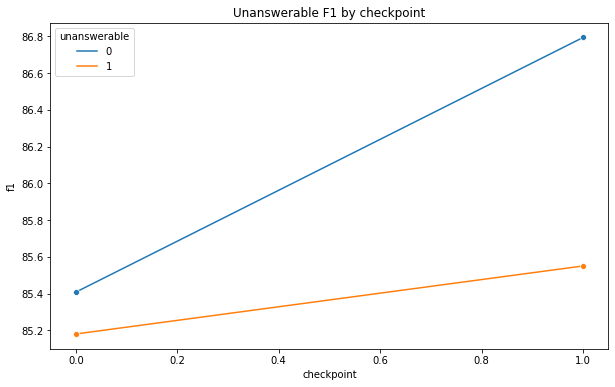

In [28]:
plt.figure(figsize=(10, 6))
plt.title('Unanswerable F1 by checkpoint')
sns.lineplot(data=full_metrics_df, y='f1', x='checkpoint', hue='unanswerable', marker='o')
plt.show()

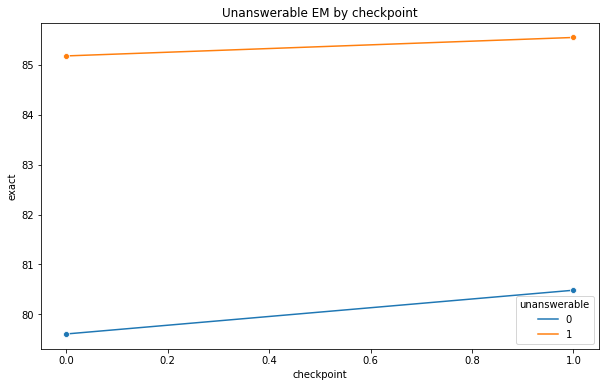

In [30]:
plt.figure(figsize=(10, 6))
plt.title('Unanswerable EM by checkpoint')
sns.lineplot(data=full_metrics_df, y='exact', x='checkpoint', hue='unanswerable', marker='o')
plt.show()

### Length metrics

#### i. Context length

In [31]:
combined.head()

,id,prediction_text,checkpoint,answers,context,question,title,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin,unanswerable
0,56ddde6b9a695914005b9628,France,0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
1,56ddde6b9a695914005b9628,France,1,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
2,56ddde6b9a695914005b9629,10th and 11th centuries,0,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,Normans,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
3,56ddde6b9a695914005b9629,10th and 11th centuries,1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,Normans,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
4,56ddde6b9a695914005b962a,"Denmark, Iceland and Norway",0,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,From which countries did the Norse originate?,Normans,which,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0


In [37]:
combined['context_length_bin'].unique()

array(['(165.106, 947.8]', '(947.8, 1726.6]', '(1726.6, 2505.4]',
       '(2505.4, 3284.2]', '(3284.2, 4063.0]'], dtype=object)

In [33]:
full_metrics_df = pd.DataFrame()

for checkpoint in combined['checkpoint'].unique():
    for label in combined['context_length_bin'].unique():
        
        combined_subset = combined.copy()[
            (combined['context_length_bin'] == label) & 
            (combined['checkpoint'] == checkpoint)
        ]
        
        id_list = list(combined_subset['id'])
        prediction_text_list = list(combined_subset['prediction_text'])
        answers_list = list(combined_subset['answers'])

        metrics = squad2_evaluation(
            id_list=id_list, 
            prediction_text_list=prediction_text_list, 
            answers_list=answers_list
        )

        metrics_df = pd.DataFrame(metrics, index=[0])
        metrics_df['context_length_bin'] = label
        metrics_df['checkpoint'] = checkpoint
        
        full_metrics_df = full_metrics_df.append(metrics_df, ignore_index=True)

In [34]:
print(full_metrics_df.shape)
full_metrics_df.head()

(10, 15)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,NoAns_exact,NoAns_f1,NoAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,context_length_bin,checkpoint
0,81.896072,84.773115,8987,79.257935,85.037099,4474,84.511411,84.511411,4513,81.896072,0.0,84.773115,0.0,"(165.106, 947.8]",0
1,83.752418,86.727317,2585,80.324074,86.257805,1296,87.199379,87.199379,1289,83.752418,0.0,86.727317,0.0,"(947.8, 1726.6]",0
2,86.026201,89.252206,229,82.258065,88.215768,124,90.476190,90.476190,105,86.026201,0.0,89.252206,0.0,"(1726.6, 2505.4]",0
3,81.132075,83.331134,53,88.000000,92.662005,25,75.000000,75.000000,28,90.566038,0.0,92.765097,0.0,"(2505.4, 3284.2]",0
4,94.736842,94.736842,19,88.888889,88.888889,9,100.000000,100.000000,10,94.736842,0.0,94.736842,0.0,"(3284.2, 4063.0]",0


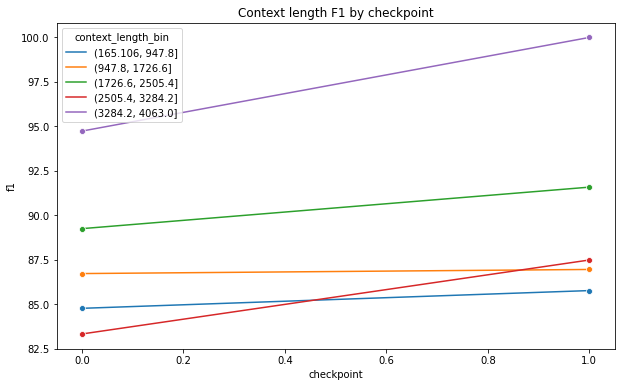

In [38]:
plt.figure(figsize=(10, 6))
plt.title('Context length F1 by checkpoint')
sns.lineplot(data=full_metrics_df, y='f1', x='checkpoint', hue='context_length_bin', marker='o')
plt.show()

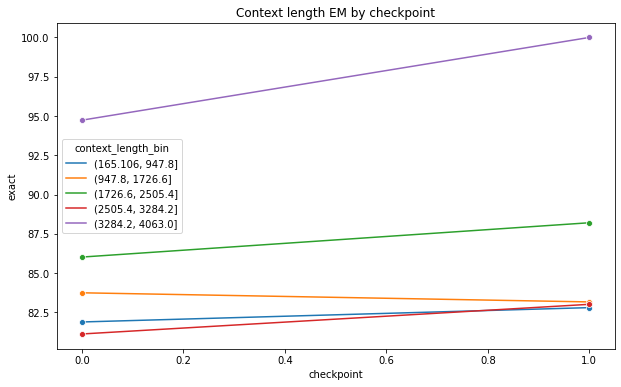

In [39]:
plt.figure(figsize=(10, 6))
plt.title('Context length EM by checkpoint')
sns.lineplot(data=full_metrics_df, y='exact', x='checkpoint', hue='context_length_bin', marker='o')
plt.show()

#### ii. Question length

In [40]:
combined.head()

,id,prediction_text,checkpoint,answers,context,question,title,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin,unanswerable
0,56ddde6b9a695914005b9628,France,0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
1,56ddde6b9a695914005b9628,France,1,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
2,56ddde6b9a695914005b9629,10th and 11th centuries,0,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,Normans,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
3,56ddde6b9a695914005b9629,10th and 11th centuries,1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,Normans,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
4,56ddde6b9a695914005b962a,"Denmark, Iceland and Norway",0,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,From which countries did the Norse originate?,Normans,which,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0


In [41]:
combined['question_length_bin'].unique()

array(['(10.814, 48.2]', '(48.2, 85.4]', '(122.6, 159.8]',
       '(85.4, 122.6]', '(159.8, 197.0]'], dtype=object)

In [42]:
full_metrics_df = pd.DataFrame()

for checkpoint in combined['checkpoint'].unique():
    for label in combined['question_length_bin'].unique():
        
        combined_subset = combined.copy()[
            (combined['question_length_bin'] == label) & 
            (combined['checkpoint'] == checkpoint)
        ]
        
        id_list = list(combined_subset['id'])
        prediction_text_list = list(combined_subset['prediction_text'])
        answers_list = list(combined_subset['answers'])

        metrics = squad2_evaluation(
            id_list=id_list, 
            prediction_text_list=prediction_text_list, 
            answers_list=answers_list
        )

        metrics_df = pd.DataFrame(metrics, index=[0])
        metrics_df['question_length_bin'] = label
        metrics_df['checkpoint'] = checkpoint
        
        full_metrics_df = full_metrics_df.append(metrics_df, ignore_index=True)

In [43]:
print(full_metrics_df.shape)
full_metrics_df.head()

(10, 15)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,NoAns_exact,NoAns_f1,NoAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,question_length_bin,checkpoint
0,81.839199,85.233121,3893,78.481013,86.083165,1738,84.547564,84.547564,2155,81.839199,0.0,85.233121,0.0,"(10.814, 48.2]",0
1,82.744158,85.263362,6676,79.412637,84.401723,3371,86.142209,86.142209,3305,82.744158,0.0,85.263362,0.0,"(48.2, 85.4]",0
2,77.586207,81.419540,116,76.250000,81.808333,80,80.555556,80.555556,36,77.586207,0.0,81.419540,0.0,"(122.6, 159.8]",0
3,82.726503,86.050793,1181,83.378747,88.727503,734,81.655481,81.655481,447,82.726503,0.0,86.050793,0.0,"(85.4, 122.6]",0
4,85.714286,85.714286,7,100.000000,100.000000,5,50.000000,50.000000,2,100.000000,0.0,100.000000,0.0,"(159.8, 197.0]",0


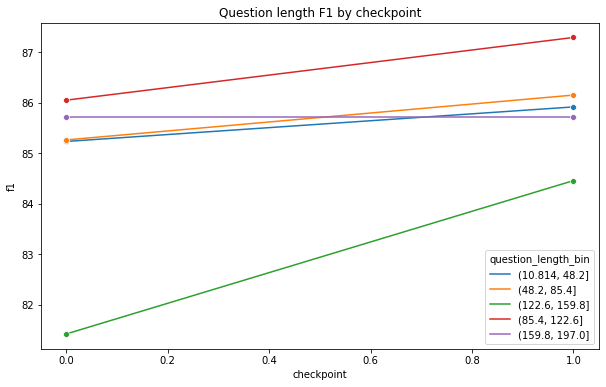

In [44]:
plt.figure(figsize=(10, 6))
plt.title('Question length F1 by checkpoint')
sns.lineplot(data=full_metrics_df, y='f1', x='checkpoint', hue='question_length_bin', marker='o')
plt.show()

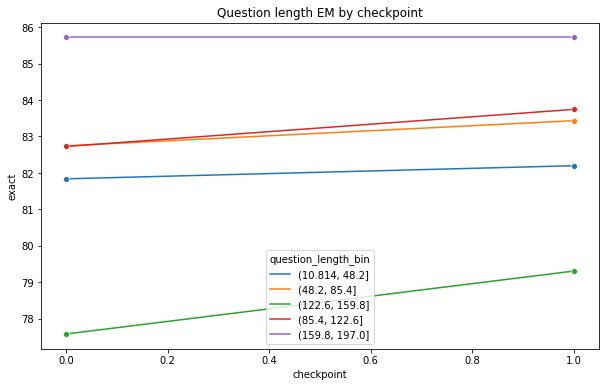

In [45]:
plt.figure(figsize=(10, 6))
plt.title('Question length EM by checkpoint')
sns.lineplot(data=full_metrics_df, y='exact', x='checkpoint', hue='question_length_bin', marker='o')
plt.show()

#### iii. Answer length

In [46]:
combined.head()

,id,prediction_text,checkpoint,answers,context,question,title,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin,unanswerable
0,56ddde6b9a695914005b9628,France,0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
1,56ddde6b9a695914005b9628,France,1,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,In what country is Normandy located?,Normans,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
2,56ddde6b9a695914005b9629,10th and 11th centuries,0,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,Normans,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
3,56ddde6b9a695914005b9629,10th and 11th centuries,1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,When were the Normans in Normandy?,Normans,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0
4,56ddde6b9a695914005b962a,"Denmark, Iceland and Norway",0,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,From which countries did the Norse originate?,Normans,which,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 39.333]",0


In [47]:
combined['answer_mean_length_bin'].unique()

array(['(-0.157, 39.333]', '0 (unanswerable)', '(39.333, 78.667]',
       '(78.667, 118.0]', '(118.0, 157.333]'], dtype=object)

In [48]:
full_metrics_df = pd.DataFrame()

for checkpoint in combined['checkpoint'].unique():
    for label in combined['answer_mean_length_bin'].unique():
        
        combined_subset = combined.copy()[
            (combined['answer_mean_length_bin'] == label) & 
            (combined['checkpoint'] == checkpoint)
        ]
        
        id_list = list(combined_subset['id'])
        prediction_text_list = list(combined_subset['prediction_text'])
        answers_list = list(combined_subset['answers'])

        metrics = squad2_evaluation(
            id_list=id_list, 
            prediction_text_list=prediction_text_list, 
            answers_list=answers_list
        )

        metrics_df = pd.DataFrame(metrics, index=[0])
        metrics_df['answer_mean_length_bin'] = label
        metrics_df['checkpoint'] = checkpoint
        
        full_metrics_df = full_metrics_df.append(metrics_df, ignore_index=True)

In [49]:
print(full_metrics_df.shape)
full_metrics_df.head()

(10, 15)


,exact,f1,total,HasAns_exact,HasAns_f1,HasAns_total,best_exact,best_exact_thresh,best_f1,best_f1_thresh,answer_mean_length_bin,checkpoint,NoAns_exact,NoAns_f1,NoAns_total
0,82.185002,86.417868,5254,82.185002,86.417868,5254.0,82.185002,0.0,86.417868,0.0,"(-0.157, 39.333]",0,NaN,NaN,NaN
1,85.180824,85.180824,5945,NaN,NaN,NaN,100.000000,0.0,100.000000,0.0,0 (unanswerable),0,85.180824,85.180824,5945.0
2,60.979730,78.533269,592,60.979730,78.533269,592.0,60.979730,0.0,78.533269,0.0,"(39.333, 78.667]",0,NaN,NaN,NaN
3,51.388889,70.703513,72,51.388889,70.703513,72.0,51.388889,0.0,70.703513,0.0,"(78.667, 118.0]",0,NaN,NaN,NaN
4,30.000000,67.957592,10,30.000000,67.957592,10.0,30.000000,0.0,67.957592,0.0,"(118.0, 157.333]",0,NaN,NaN,NaN


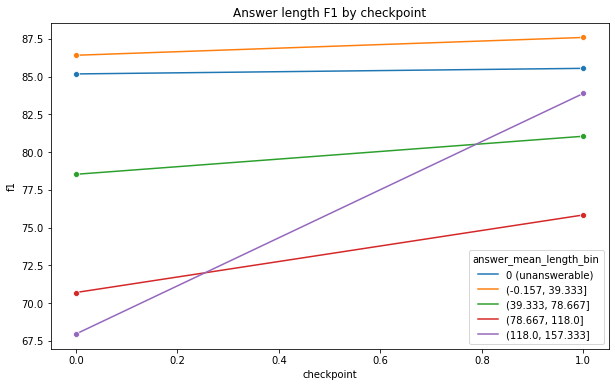

In [51]:
plt.figure(figsize=(10, 6))
plt.title('Answer length F1 by checkpoint')
sns.lineplot(
    data=full_metrics_df, y='f1', x='checkpoint', hue='answer_mean_length_bin', marker='o', 
    hue_order=['0 (unanswerable)', '(-0.157, 39.333]', '(39.333, 78.667]', '(78.667, 118.0]', '(118.0, 157.333]']
)
plt.show()

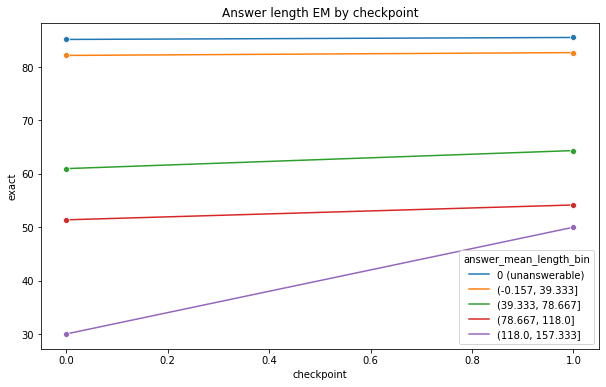

In [54]:
plt.figure(figsize=(10, 6))
plt.title('Answer length EM by checkpoint')
sns.lineplot(
    data=full_metrics_df, y='exact', x='checkpoint', hue='answer_mean_length_bin', marker='o',
    hue_order=['0 (unanswerable)', '(-0.157, 39.333]', '(39.333, 78.667]', '(78.667, 118.0]', '(118.0, 157.333]']
)
plt.show()

### TODO: 
- Replace x-labels with number of examples